<a href="https://colab.research.google.com/github/10erick-cpu/Entregas/blob/main/TP4/TP4_Histograma_de_Luminancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico IV**


# **Para este TP se desea que implementen lo siguiente**:

## **Primera Parte**

*  Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.

## **Segunda Parte**

* Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

## **Tercera Parte**

* Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.





### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Steven Martinez Vargas


In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Librerias Usadas**

In [208]:
import matplotlib.pyplot as plt 
import numpy as np
import imageio as io
from PIL import Image


# **Primera Parte**

# **Función para leer la imágen y mostrarla**

(540, 540, 3) <class 'numpy.ndarray'>


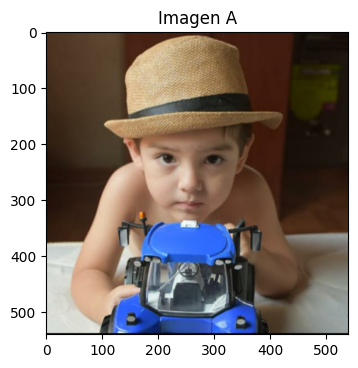

In [209]:
########## Librerias Usadas ##############

import numpy as np
from PIL import Image
import imageio as io
import matplotlib.pyplot as plt

### Función para leer la Imagen y convertirlo en array ###

def read_ima(path):
    ima = np.asarray(Image.open(path))
    print(ima.shape, type(ima))
    return ima

# im_a = read_ima(path1)  # Test de la funcion

### Función para leer los canales RGB ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0], ima[:, :, 1], ima[:, :, 2]
    return r, g, b

# r,g,b= channels_ima(im_a)
# print(r,g,b)


## Defino los paths ##

path1 = '/content/joaquin.jpeg'

## Leo las imagenes A Y B  en funcion de los paths ##

ima1 = read_ima(path1)

### Graficamos la imagen 1 ###

def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('on')
  plt.show()

plot_image(ima1 ,title='Imagen A')

#**Espacio YIQ**

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ**

#**Cargamos Imágenes**

#**Imagen A**

In [222]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

ra,ga,ba = channels_ima(ima1)

# print(ra,ga,ba)

### Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

def trans_rgb_to_yiq(r,g,b):
    y= 0.299*r + 0.587*g + 0.114*b
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return clip_rgb(r,g,b)

####  Funciones para Clipear los espacios YIQ & RGB ####

def clip_rgb(r,g,b): 
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

def clip_yiq(y,i,q):
  y=np.clip(y,0,1)
  i=np.clip(i,-0.5957,0.5957)
  q=np.clip(q,-0.5226,0.5226)
  return y,i,q


# **Valores de Ya Ia Qa - Imágen A**

In [212]:
### Valores de Y I Q , para la imagen A

Ra,Ga,Ba = clip_rgb(ra,ga,ba)

# Ra,Ga,Ba

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Ya,Ia,Qa = trans_rgb_to_yiq(Ra,Ga,Ba)

# Ya,Ia,Qa = trans_rgb_to_yiq(ra,ga,ba)

YA,IA,QA = clip_yiq(Ya,Ia,Qa)

# Obtenemos la Luminancia

YA

array([[0.22931373, 0.22931373, 0.22931373, ..., 0.05526667, 0.05526667,
        0.05526667],
       [0.22931373, 0.22931373, 0.22931373, ..., 0.0631098 , 0.0631098 ,
        0.0631098 ],
       [0.22931373, 0.22931373, 0.22931373, ..., 0.07487451, 0.07487451,
        0.07487451],
       ...,
       [0.86824314, 0.86824314, 0.86432157, ..., 0.62041569, 0.62041569,
        0.62041569],
       [0.38196863, 0.38196863, 0.37804706, ..., 0.27923922, 0.27923922,
        0.27923922],
       [0.00549804, 0.00274902, 0.00274902, ..., 0.00274902, 0.00274902,
        0.00274902]])

# **Histograma de la Imagen**

Text(0.5, 1.0, 'Histograma - Y_Imagen A ')

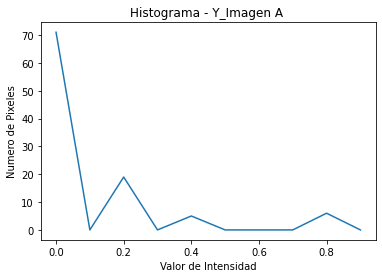

In [224]:
### Funcion para obtener en el Histograma de una imagen ###

a = np.arange(0,1,0.1)

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YA.shape[:2] #Numero total de filas y columnas 
value1, count1 = histogram_plot(YA)

# Ploteo del Histograma

plt.plot(value1, count1)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Imagen A ')
   


# **Segunda Parte** 

# **Cargamos imágenes con problemas de iluminación (una oscura y otra muy brillante)**.

# **Imágen Oscura - Dark Image**

(540, 540, 3) <class 'numpy.ndarray'>


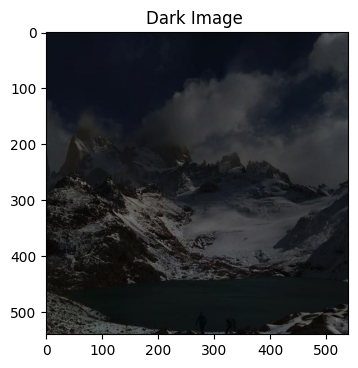

In [225]:
## Defino los paths ##
path2 = '/content/paine.jpeg'

## Leo la imagen en funcion del path##
ima2 = read_ima(path2)

### Graficamos la imagen 2 ###
Dark_image= plot_image(ima2 ,title='Dark Image ')

### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

rb,gb,bb = channels_ima(ima2)
# print(rb,gb,bb)

## Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

def trans_rgb_to_yiq(r,g,b):
    y= 0.299*r + 0.587*g + 0.114*b
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return clip_rgb(r,g,b)

####  Funciones para Clipear los espacios YIQ & RGB ####

def clip_rgb(r,g,b): 
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

def clip_yiq(y,i,q):
  y=np.clip(y,0,1)
  i=np.clip(i,-0.5957,0.5957)
  q=np.clip(q,-0.5226,0.5226)
  return y,i,q

# **Valores de Yb Ib Qb - Dark Image**

In [226]:
### Valores de Y I Q , para la imagen ####

def clip_rgb(r,g,b): ## ### Clipeamos RGB ##
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rb,Gb,Bb = clip_rgb(rb,gb,bb)

# Rb,Gb,Bb

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yb,Ib,Qb = trans_rgb_to_yiq(Rb,Gb,Bb)

YB,IB,QB = clip_yiq(Yb,Ib,Qb)

# Obtenemos la Luminancia
YB

array([[0.0580549 , 0.0580549 , 0.0580549 , ..., 0.2906    , 0.28275686,
        0.27491373],
       [0.0580549 , 0.0580549 , 0.0580549 , ..., 0.27883529, 0.27099216,
        0.26314902],
       [0.0580549 , 0.0580549 , 0.0580549 , ..., 0.25922745, 0.25530588,
        0.25138431],
       ...,
       [0.18548627, 0.14627059, 0.25607451, ..., 0.12941176, 0.14117647,
        0.14901961],
       [0.24038824, 0.2325451 , 0.31489804, ..., 0.12941176, 0.12941176,
        0.12941176],
       [0.34627059, 0.32274118, 0.29921176, ..., 0.1254902 , 0.12156863,
        0.11372549]])

# **Histograma Dark Image**

Text(0.5, 1.0, 'Histograma - Y_Imagen Dark ')

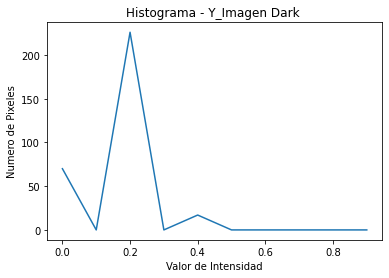

In [228]:
### Funcion para obtener en el Histograma de una imagen ###


def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YB.shape[:2] #Numero total de filas y columnas 
value2, count2 = histogram_plot(YB)

# Ploteo del Histograma

plt.plot(value2, count2)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Imagen Dark ')

# **Valores de Y I Q - Dark Image con alfa = 2**

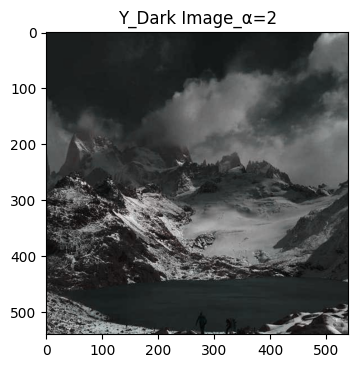

In [230]:
### Valores de Y I Q , para la imagen ###

def clip_rgb(r,g,b): ## ### Clipeamos RGB ### No es necesario 
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rb,Gb,Bb = clip_rgb(rb,gb,bb )

# Rb,Gb,Bb

## Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

alfa = 2 

# Multiplicamos por alfa = 2 para analizar la Luminancia

def trans_rgb_to_yiq(r,g,b):
    y= (0.299*r + 0.587*g + 0.114*b)*alfa
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

# #### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yb1,Ib1,Qb1 = trans_rgb_to_yiq(Rb,Gb,Bb)


YB1,IB1,QB1 = clip_yiq(Yb1,Ib1,Qb1)

# Parametros Finales - YB,IB,QB #YB1) 

YB1

#### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

R,G,B = trans_yiq_to_rgb(YB1,IB1,QB1)

### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rf,Gf,Bf = clip_rgb(R,G,B)

Rf,Gf,Bf

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out2 = rgb_to_image(Rf,Gf,Bf)

plot_image(im_out2, 'Y_Dark Image_α=2')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_Dark Image_α=2.png', im_out2)

#**Histograma Dark Image α=2**

Text(0.5, 1.0, 'Histograma Dark Image α=2')

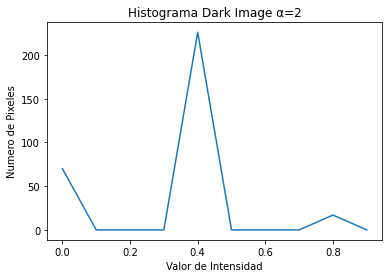

In [232]:
### Funcion para obtener en el Histograma de una imagen ###

a = np.arange(0,1,0.1)

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# # Considerando la Luminancia para el grafico

m, n = YB1.shape[:2] #Numero total de filas y columnas 
value3, count3 = histogram_plot(YB1)

# Ploteo del Histograma

plt.plot(value3, count3)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma Dark Image α=2')

#**Shiny Image - Imagen Brillante**

(540, 540, 3) <class 'numpy.ndarray'>


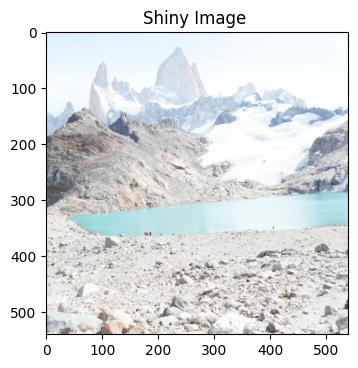

In [234]:
## Defino los paths ##
path3 = '/content/fitzroy.jpeg'

## Leo la imagen en funcion del path##
ima3 = read_ima(path3)

### Graficamos la imagen 2 ###
plot_image(ima3 ,title='Shiny Image ')

### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

rc,gc,bc = channels_ima(ima3)
# rc,gc,bc


## Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

def trans_rgb_to_yiq(r,g,b):
    y= 0.299*r + 0.587*g + 0.114*b
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return clip_rgb(r,g,b)

####  Funciones para Clipear los espacios YIQ & RGB ####

def clip_rgb(r,g,b): 
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

def clip_yiq(y,i,q):
  y=np.clip(y,0,1)
  i=np.clip(i,-0.5957,0.5957)
  q=np.clip(q,-0.5226,0.5226)
  return y,i,q

# **Valores de Y I Q - Shiny Imagen**

In [236]:
### Valores de Y I Q , para la imagen ##

def clip_rgb(r,g,b): ## ### Clipeamos RGB ##
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rc,Gc,Bc = clip_rgb(rc,gc,bc)

Rc,Gc,Bc

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yc,Ic,Qc = trans_rgb_to_yiq(Rc,Gc,Bc)

YC,IC,QC = clip_yiq(Yc,Ic,Qc)

# Obtenemos la Luminancia

YC

# np.amin(YC)
# # np.amax(YC)


array([[0.92399216, 0.92399216, 0.92399216, ..., 0.99138824, 0.99138824,
        0.99138824],
       [0.92399216, 0.92399216, 0.92399216, ..., 0.99138824, 0.99138824,
        0.99138824],
       [0.92399216, 0.92399216, 0.92399216, ..., 0.99138824, 0.99138824,
        0.99138824],
       ...,
       [0.93956078, 0.91603137, 0.85486275, ..., 0.90119216, 0.90511373,
        0.91295686],
       [0.97525882, 0.9725098 , 0.94388627, ..., 0.89727059, 0.90119216,
        0.90903529],
       [0.93604314, 0.95330588, 0.94978824, ..., 0.89727059, 0.90119216,
        0.90511373]])

# **Histograma Shiny Image**

Text(0.5, 1.0, 'Histograma - Y_Shiny Imagen ')

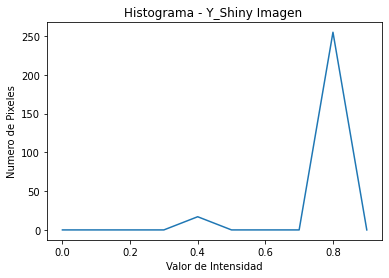

In [238]:
### Funcion para obtener en el Histograma de una imagen ###


def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YC.shape[:2] #Numero total de filas y columnas 
value4, count4 = histogram_plot(YC)

# Ploteo del Histograma

plt.plot(value4, count4)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Shiny Imagen ')



# **Valores de Y I Q - Shiny Image con alfa = 0.4**

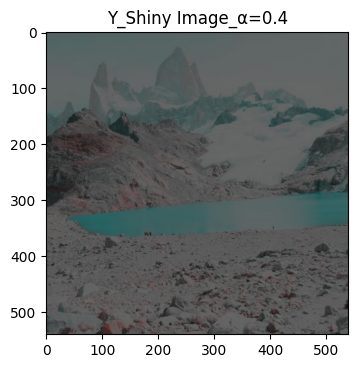

In [239]:
### Valores de Y I Q , para la imagen 

## Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

# alfa1 = 0.4

# Multiplicamos por alfa = 0.4 para analizar la Luminancia

def trans_rgb_to_yiq(r,g,b):
    y= (0.299*r + 0.587*g + 0.114*b)*0.4
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

# #### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yc1,Ic1,Qc1 = trans_rgb_to_yiq(Rc,Gc,Bc)


YC1,IC1,QC1 = clip_yiq(Yc1,Ic1,Qc1)

# Parametros Finales - YC1,IC1,QC1 #
YC1

#### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

R,G,B = trans_yiq_to_rgb(YC1,IC1,QC1)

### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rf1,Gf1,Bf1 = clip_rgb(R,G,B)

Rf1,Gf1,Bf1

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out3 = rgb_to_image(Rf1,Gf1,Bf1)

plot_image(im_out3, 'Y_Shiny Image_α=0.4')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_Shiny Image_α=0.4.png', im_out3)

#**Histograma Shiny Image α=0.4**

Text(0.5, 1.0, 'Histograma Shiny Image α=0.4')

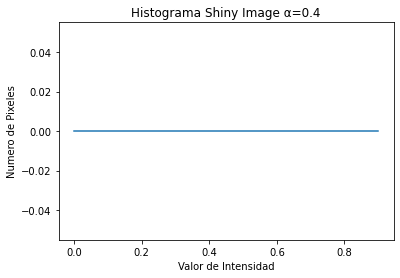

In [240]:
### Funcion para obtener en el Histograma de una imagen ###

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# # Considerando la Luminancia para el grafico

m, n = YC1.shape[:2] #Numero total de filas y columnas 
value5, count5 = histogram_plot(YC1)

# Ploteo del Histograma

plt.plot(value5, count5)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma Shiny Image α=0.4')

# **Gráficos Imágenes - Histogramas**

# **Dark Image**

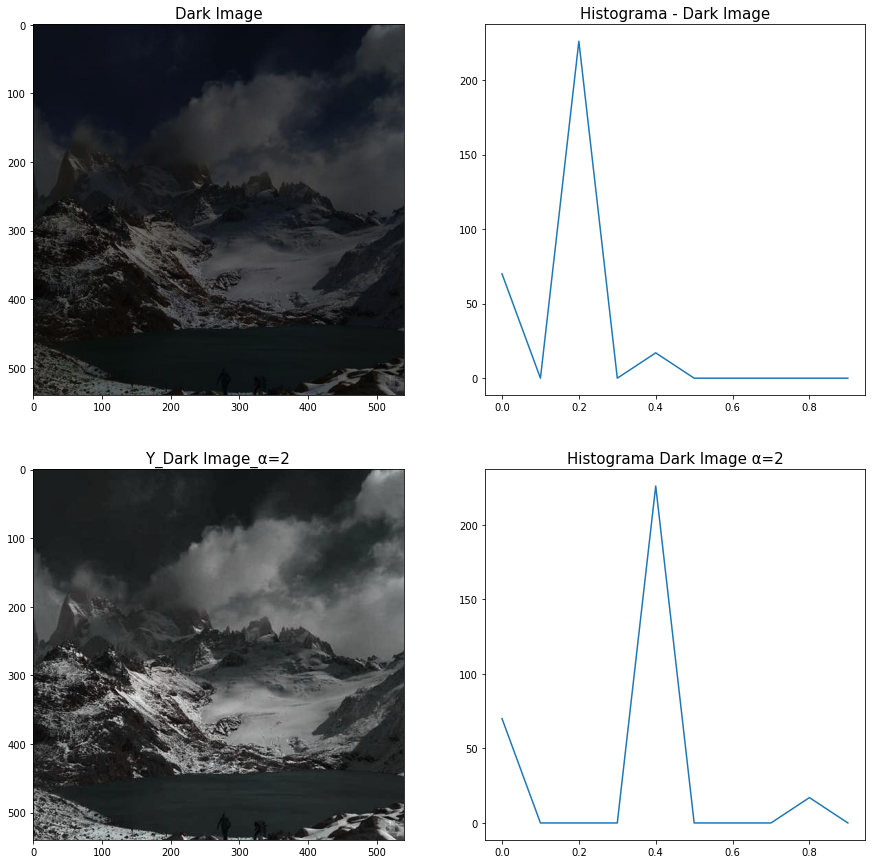

In [242]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(ima2)
plt.title('Dark Image',fontsize=15),plt.axis('on') 

plt.subplot(222)
plt.plot(value2,count2)
plt.title('Histograma - Dark Image',fontsize=15),plt.axis('on')


plt.subplot(223)
plt.imshow(im_out2)
plt.title('Y_Dark Image_α=2',fontsize=15),plt.axis('on') 

plt.subplot(224)
plt.plot(value3, count3)
plt.title('Histograma Dark Image α=2',fontsize=15),plt.axis('on')


plt.show()

# **Algunas Conclusiones**

Para una imágen oscura podemos observar que una gran cantidad de pixeles tiene una Luminancia en la region entre 0.1, y 0.3, como se puede observar en la imagen Histogram Dark Image.

Al multiplicar 'Y' por un alfa = 2, seguimos teniendo una gran cantidad de pixeles en una region muy parecida, el resultado sera mover el histograma, sin alterar el hecho inadecuado que es que muchos pixeles tienen un Luminancia Similar como se observa en la Imagen Dark Image alfa = 2.



# **Shiny Image**

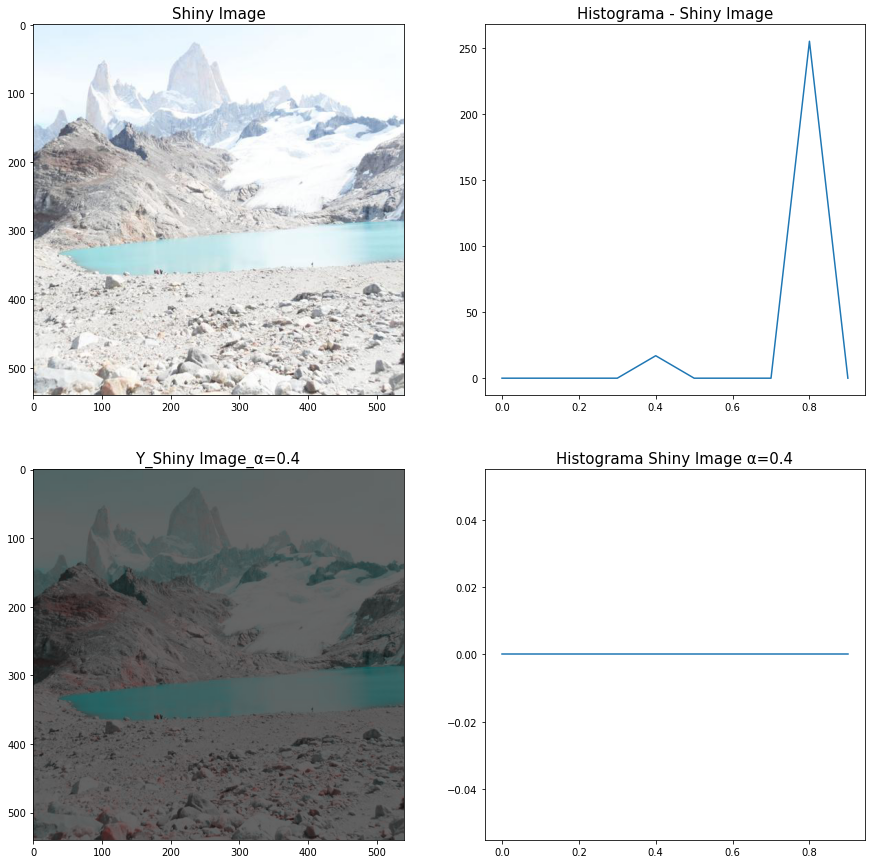

In [243]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(ima3)
plt.title('Shiny Image',fontsize=15),plt.axis('on') 

plt.subplot(222)
plt.plot(value4,count4)
plt.title('Histograma - Shiny Image',fontsize=15),plt.axis('on')


plt.subplot(223)
plt.imshow(im_out3)
plt.title('Y_Shiny Image_α=0.4',fontsize=15),plt.axis('on') 

plt.subplot(224)
plt.plot(value5, count5)
plt.title('Histograma Shiny Image α=0.4',fontsize=15),plt.axis('on')


plt.show()


# **Tercera Parte** 

# **Función Potencia Cuadratica**

# **Dark Image**

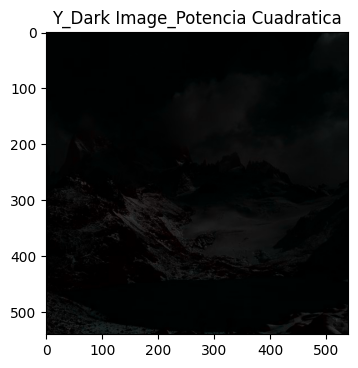

In [244]:
# Función Potencia Cuadratica

Ypc = YB**2

# Obtenemos la Luminancia previo clipeo
YPC=np.clip(Ypc,0,1)
YPC

# Otra forma - Generando una Función - Only Reference

# def squaredpot(Y):
#   dim=Y.shape
#   YPc=np.zeros((dim[0],dim[1]),dtype =float)
#   YPc=Y**2
#   YPC=np.clip(YPc,0,1)
#   return YPC

# YPC = squaredpot(YB)
# YPC


#### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

Rd,Gd,Bd = trans_yiq_to_rgb(YPC,IB,QB)


### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rpc,Gpc,Bpc = clip_rgb(Rd,Gd,Bd)

Rpc,Gpc,Bpc

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out4 = rgb_to_image(Rpc,Gpc,Bpc)

plot_image(im_out4, 'Y_Dark Image_Potencia Cuadratica')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_DarkImagePotCuadra.png', im_out4)




# **Histograma Dark Image - Potencia Cuadratica**

Text(0.5, 1.0, 'Histograma - Y_Dark Image_Potencia Cuadratica ')

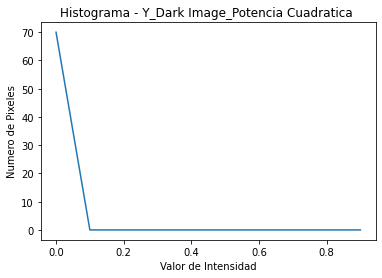

In [245]:
### Funcion para obtener en el Histograma de una imagen ###

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YPC.shape[:2] #Numero total de filas y columnas 
value6, count6 = histogram_plot(YPC)

# Ploteo del Histograma
plt.plot(value6, count6)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Dark Image_Potencia Cuadratica ')


# **Shiny Image**

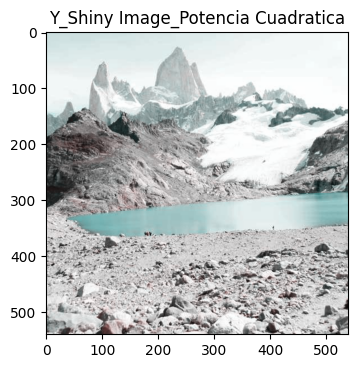

In [246]:
Ypc1 = YC**2

# Obtenemos la Luminancia previo clipeo

YPC1=np.clip(Ypc1,0,1)

YPC1

#### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

Re,Ge,Be = trans_yiq_to_rgb(YPC1,IC,QC)

### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rpc1,Gpc1,Bpc1 = clip_rgb(Re,Ge,Be)

Rpc1,Gpc1,Bpc1

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out5 = rgb_to_image(Rpc1,Gpc1,Bpc1)

plot_image(im_out5, 'Y_Shiny Image_Potencia Cuadratica')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_ShinyImagePotCuadra.png', im_out5)


# **Histograma Shiny Image - Potencia Cuadratica**

Text(0.5, 1.0, 'Histograma - Y_Shiny Image_Potencia Cuadratica ')

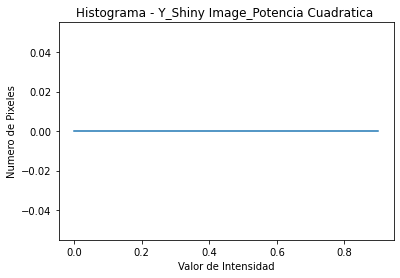

In [247]:
### Funcion para obtener en el Histograma de una imagen ###

a = np.arange(0,1,0.1)

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YPC1.shape[:2] #Numero total de filas y columnas 
value7, count7 = histogram_plot(YPC1)

# Ploteo del Histograma
plt.plot(value7, count7)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Shiny Image_Potencia Cuadratica ')

# **Función Raíz cuadrada**

# **Dark Image**

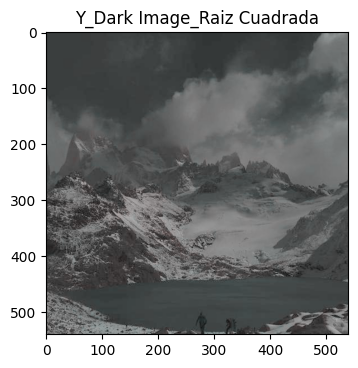

In [248]:
# # Funcion Raiz cuadrada

# def square_root(Y):
#   dim= Y.shape
#   Ypc2=np.zeros((dim[0],dim[1]),dtype =float)
#   Ypc2=np.sqrt(Y,dtype=float)
#   Ypc2=np.clip(Ypc2,0,1)
#   return Ypc2

# YPC2 = square_root(YB)
# YPC2

# # Otra forma - Obtenemos la Luminancia previo clipeo

Ypc2=np.sqrt(YB)
YPC2 = np.clip(Ypc2,0,1)
YPC2

# #### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

R,G,B = trans_yiq_to_rgb(YPC2,IB,QB)

### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rpc2,Gpc2,Bpc2 = clip_rgb(R,G,B)

Rpc2,Gpc2,Bpc2

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out6 = rgb_to_image(Rpc2,Gpc2,Bpc2)

plot_image(im_out6, 'Y_Dark Image_Raiz Cuadrada')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_DarkRaizCuadrada.png', im_out6)




# **Histograma Dark Image - Raíz Cuadrada**

Text(0.5, 1.0, 'Histograma - Y_Dark Image_Raíz Cuadrada ')

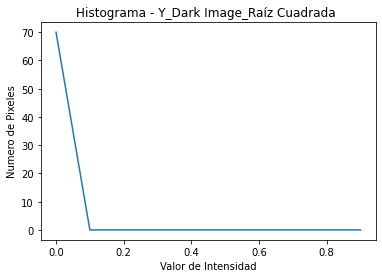

In [249]:
### Funcion para obtener en el Histograma de una imagen ###


def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YPC2.shape[:2] #Numero total de filas y columnas 
value8, count8 = histogram_plot(YPC2)

# Ploteo del Histograma
plt.plot(value8, count8)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Dark Image_Raíz Cuadrada ')

# **Shiny Image**

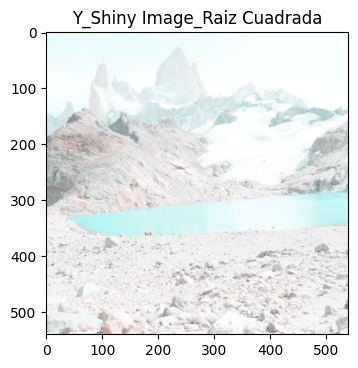

In [250]:

Ypc3=np.sqrt(YC)
YPC3=np.clip(Ypc3,0,1)
YPC3

# #### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

R,G,B = trans_yiq_to_rgb(YPC3,IC,QC)

### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

Rpc3,Gpc3,Bpc3 = clip_rgb(R,G,B)

Rpc3,Gpc3,Bpc3

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out7 = rgb_to_image(Rpc3,Gpc3,Bpc3)

plot_image(im_out7, 'Y_Shiny Image_Raiz Cuadrada')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_ShinyImageRaizCuadrada.png', im_out7)





# **Histograma Shiny Image - Raíz Cuadrada**

Text(0.5, 1.0, 'Histograma - Y_Shiny Image_Raíz Cuadrada ')

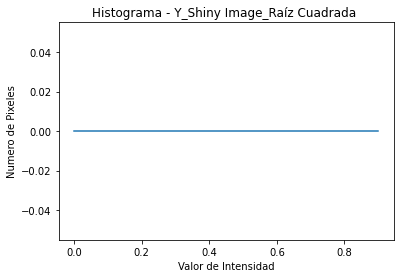

In [251]:
### Funcion para obtener en el Histograma de una imagen ###

a = np.arange(0,1,0.1)

def histogram_plot(img):
    count = [] #  Recuento de cada valor de intensidad
    value = [] #  Almanceno los valores de intensidad

    for k in a:  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YPC3.shape[:2] #Numero total de filas y columnas 
value9, count9 = histogram_plot(YPC3)

# Ploteo del Histograma
plt.plot(value9, count9)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Shiny Image_Raíz Cuadrada ')

# **Función Lineal a trozos**

#**Dark Image**

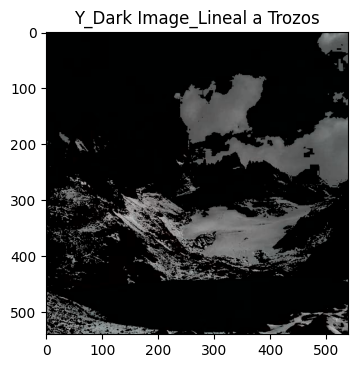

In [252]:
##  Funcion lineal a trozos ##

# Definimos los valores de Luminancia

## Ymin = 0.2
## Ymax = 0.8

def lin_trozos(Y,Ymin,Ymax):
  dim= Y.shape
  YL= np.zeros((dim[0],dim[1]),dtype = 'float')
  for i in range(dim[0]):
    for j in range(dim[1]):
      if (Y[i,j]<Ymin):
        YL[i,j]=0
      elif (Y[i,j]>Ymax):
        YL[i,j]=1
      else:
        YL[i,j]=Y[i,j]/(Ymax - Ymin) 
  YL=np.clip(YL,0,1)
  return YL
    
YLT = lin_trozos(YB,0.2,0.8)
YLT


#### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

RL,GL,BL = trans_yiq_to_rgb(YLT,IB,QB)


### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b



Rlt,Glt,Blt = clip_rgb(RL,GL,BL)

Rlt,Glt,Blt

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out8 = rgb_to_image(Rlt,Glt,Blt)

plot_image(im_out8,'Y_Dark Image_Lineal a Trozos')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_DarkLineal.png', im_out8)
      

# **Histograma Dark Image - Lineal a Trozos** 

Text(0.5, 1.0, 'Histograma - Y_Dark Image_Lineal a trozos ')

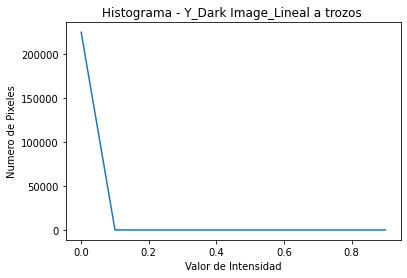

In [253]:
### Funcion para obtener en el Histograma de una imagen ###

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YLT.shape[:2] #Numero total de filas y columnas 
value10, count10 = histogram_plot(YLT)

# Ploteo del Histograma
plt.plot(value10, count10)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Dark Image_Lineal a trozos ')

#**Shiny Image**

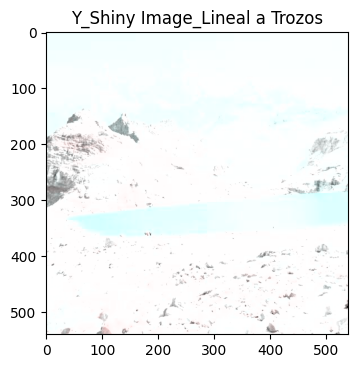

In [263]:
##  Funcion lineal a trozos ##

# Definimos los valores de Luminancia

Ymin = 0.2
Ymax = 0.8

def lin_trozos(Y,Ymin,Ymax):
  dim= Y.shape
  YL= np.zeros((dim[0],dim[1]),dtype = 'float')
  for i in range(dim[0]):
    for j in range(dim[1]):
      if (Y[i,j]<Ymin):
        YL[i,j]=0
      elif (Y[i,j]>Ymax):
        YL[i,j]=1
      else:
        YL[i,j]=Y[i,j]/(Ymax - Ymin) 
  YL=np.clip(YL,0,1)
  return YL
    
YLT1 = lin_trozos(YC,0.2,0.8)
YLT1


#### Retornamos al Espacio RGB ###

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return (r,g,b)

RL1,GL1,BL1 = trans_yiq_to_rgb(YLT1,IC,QC)


### Clipeamos [0,255] ##

def clip_rgb(r,g,b): ## Ya definido al inicio - solo referencia
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b



Rlt1,Glt1,Blt1 = clip_rgb(RL1,GL1,BL1)

Rlt1,Glt1,Blt1

# Construir Imagen a partir de sus componentes RGB

def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

im_out9 = rgb_to_image(Rlt1,Glt1,Blt1)

plot_image(im_out9,'Y_Shiny Image_Lineal a Trozos')

# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Y_ShinyImageLineal.png', im_out9)

# **Histograma Shiny Image - Lineal a Trozos** 

Text(0.5, 1.0, 'Histograma - Y_Shiny Image_Lineal a trozos ')

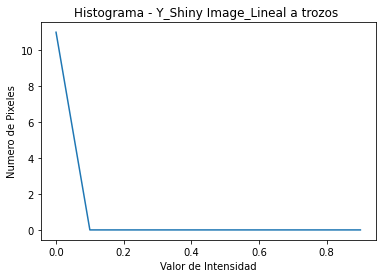

In [261]:
### Funcion para obtener en el Histograma de una imagen ###

def histogram_plot(img):
    count =[] #  Recuento de cada valor de intensidad
    value = [] # Almanceno los valores de intensidad

    for k in np.arange(0,1,0.1):  # Recorro cada valor de intensidad
        value.append(k)
        count1 = 0

        for i in range(m):  # Recorro cada pixel de la Imagen
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (value, count)
  
# Considerando la Luminancia para el grafico

m, n = YLT1.shape[:2] #Numero total de filas y columnas 
value11, count11 = histogram_plot(YLT1)

### Ploteo del Histograma ####

plt.plot(value11, count11)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Numero de Pixeles')
plt.title('Histograma - Y_Shiny Image_Lineal a trozos ')

# **Dark Image Filters**

In [264]:
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im

## Path de imagenes guardadas ##

DarkImage = '/content/paine.jpeg'   # Dark Imagen

DarkPotCuadratica = '/content/Y_DarkImagePotCuadra.png' # Potencia Cuadratica
DarkRaizCuadrada = '/content/Y_DarkRaizCuadrada.png'  # Raiz Cuadrada
DarkLineal ='/content/Y_DarkLineal.png' # Lineal a Trozos

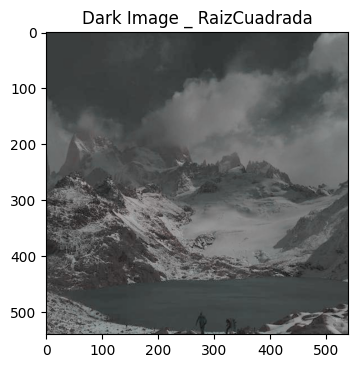

In [265]:
#@title Dark Image Filters - Selecccione una Imágen. { run: "auto" }

Imagen = 'DarkRaizCuadrada' #@param ["DarkImage","DarkPotCuadratica","DarkRaizCuadrada","DarkLineal"]

if Imagen == 'DarkImage':
  im = get_image(DarkImage)
  plot_image(im, 'Dark Image')
elif Imagen == 'DarkPotCuadratica':
  im = get_image(DarkPotCuadratica)
  plot_image(im, 'Dark Image_Potencia Cuadratica')
elif Imagen == 'DarkRaizCuadrada':
  im = get_image(DarkRaizCuadrada)
  plot_image(im,'Dark Image _ RaizCuadrada')
elif Imagen == 'DarkLineal':
  im = get_image(DarkLineal)
  plot_image(im,'Dark Image_Lineal')

# **Shiny Image Filters**

In [266]:

## Path de imagenes guardadas ##

ShinyImagen = '/content/fitzroy.jpeg'   # Shiny Imagen

ShinyPotCuadratica = '/content/Y_ShinyImagePotCuadra.png' # Potencia Cuadratica
ShinyRaizCuadrada = '/content/Y_ShinyImageRaizCuadrada.png'  # Raiz Cuadrada
ShinyLineal ='/content/Y_ShinyImageLineal.png' # Lineal a Trozos



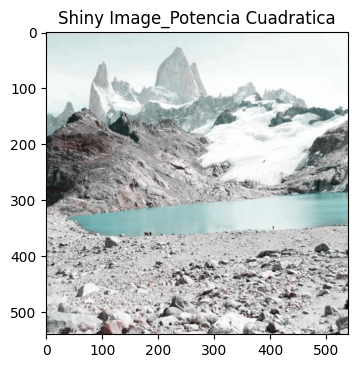

In [267]:
#@title Shiny Image Filters - Selecccione una Imágen. { run: "auto" }

Imagen = 'ShinyPotCuadratica' #@param ["ShinyImagen","ShinyPotCuadratica","ShinyRaizCuadrada","ShinyLineal"]

if Imagen == 'ShinyImagen':
  im = get_image(ShinyImagen)
  plot_image(im, 'Shiny Imagen')
elif Imagen == 'ShinyPotCuadratica':
  im = get_image(ShinyPotCuadratica)
  plot_image(im, 'Shiny Image_Potencia Cuadratica')
elif Imagen == 'ShinyRaizCuadrada':
  im = get_image(ShinyRaizCuadrada)
  plot_image(im,'Shiny Image _ RaizCuadrada')
elif Imagen == 'ShinyLineal':
  im = get_image(ShinyLineal)
  plot_image(im,'Shiny Image_Lineal')